In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('/Users/huangshifeng/Desktop/stage_III_colon_surv/data/raw_data.csv')

In [14]:
#瞄一眼
df.info()
df_highCEA = df[df['CEA_PreOp']>100]
high_CEA_ids = df_highCEA['Chart_No'].to_list()
print(high_CEA_ids)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient_ID            331 non-null    int64  
 1   Chart_No              331 non-null    int64  
 2   Dx_Date               331 non-null    object 
 3   Dx_Year               331 non-null    int64  
 4   Age                   331 non-null    int64  
 5   Sex                   331 non-null    int64  
 6   BMI                   327 non-null    float64
 7   ECOG                  314 non-null    float64
 8   Tumor_Location        331 non-null    int64  
 9   Tumor_Location_Group  331 non-null    int64  
 10  pT_Stage              331 non-null    object 
 11  pN_Stage              331 non-null    object 
 12  AJCC_Substage         331 non-null    object 
 13  LN_Total              331 non-null    int64  
 14  LN_Positive           331 non-null    int64  
 15  LNR                   3

In [15]:
#去掉不需要的欄位
df1 = df.drop(columns=['Chart_No', 'Dx_Date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient_ID            331 non-null    int64  
 1   Dx_Year               331 non-null    int64  
 2   Age                   331 non-null    int64  
 3   Sex                   331 non-null    int64  
 4   BMI                   327 non-null    float64
 5   ECOG                  314 non-null    float64
 6   Tumor_Location        331 non-null    int64  
 7   Tumor_Location_Group  331 non-null    int64  
 8   pT_Stage              331 non-null    object 
 9   pN_Stage              331 non-null    object 
 10  AJCC_Substage         331 non-null    object 
 11  LN_Total              331 non-null    int64  
 12  LN_Positive           331 non-null    int64  
 13  LNR                   331 non-null    object 
 14  Histology             331 non-null    int64  
 15  Differentiation       3

In [16]:
df1.dtypes

#轉資料型態
df1['ECOG'] = df1['ECOG'].astype('Int8')
df1.dtypes

df1['pT_Stage'].unique()
labels = ['1', '2', '3', '4A', '4B']
df1['pT_Stage'] = pd.Categorical(df1['pT_Stage'], categories = labels, ordered = True)

df1['pN_Stage'].unique()
N_stage_labels = ['1A', '1B', '1C', '2A', '2B']
df1['pN_Stage'] = pd.Categorical(df1['pN_Stage'], categories = N_stage_labels, ordered = True)

df1['AJCC_Substage'].unique()
AJCC_stage_labels = ['3A', '3B', '3C']
df1['AJCC_Substage'] = pd.Categorical(df1['AJCC_Substage'], categories = AJCC_stage_labels, ordered = True)

df1.dtypes

Patient_ID                 int64
Dx_Year                    int64
Age                        int64
Sex                        int64
BMI                      float64
ECOG                        Int8
Tumor_Location             int64
Tumor_Location_Group       int64
pT_Stage                category
pN_Stage                category
AJCC_Substage           category
LN_Total                   int64
LN_Positive                int64
LNR                       object
Histology                  int64
Differentiation            int64
LVI                      float64
PNI                      float64
Tumor_Deposits             int64
Mucinous_Gt_50             int64
Mucinous_Any               int64
Signet_Ring                int64
MSI_Status                object
Tumor_Size_cm            float64
CEA_PreOp                float64
Log_CEA_PreOp            float64
Radical_Op_Date           object
Op_Procedure              object
PreOp_Albumin            float64
Last_FU_Date              object
Recurrence

In [17]:
#來處理全部的objects
df1['MSI_Status'].unique()
df1['MSI_Status'] = df1['MSI_Status'].astype('category')

df1['Radical_Op_Date'] = pd.to_datetime(df1['Radical_Op_Date'])
df1['Last_FU_Date'] = pd.to_datetime(df1['Last_FU_Date'])
df1['Recurrence_Date'] = pd.to_datetime(df1['Recurrence_Date'])
df1['Op_Procedure'] = df1['Op_Procedure'].astype('category')
df1['Recurrence_Type'] = df1['Recurrence_Type'].astype('category')

df1.dtypes


Patient_ID                       int64
Dx_Year                          int64
Age                              int64
Sex                              int64
BMI                            float64
ECOG                              Int8
Tumor_Location                   int64
Tumor_Location_Group             int64
pT_Stage                      category
pN_Stage                      category
AJCC_Substage                 category
LN_Total                         int64
LN_Positive                      int64
LNR                             object
Histology                        int64
Differentiation                  int64
LVI                            float64
PNI                            float64
Tumor_Deposits                   int64
Mucinous_Gt_50                   int64
Mucinous_Any                     int64
Signet_Ring                      int64
MSI_Status                    category
Tumor_Size_cm                  float64
CEA_PreOp                      float64
Log_CEA_PreOp            

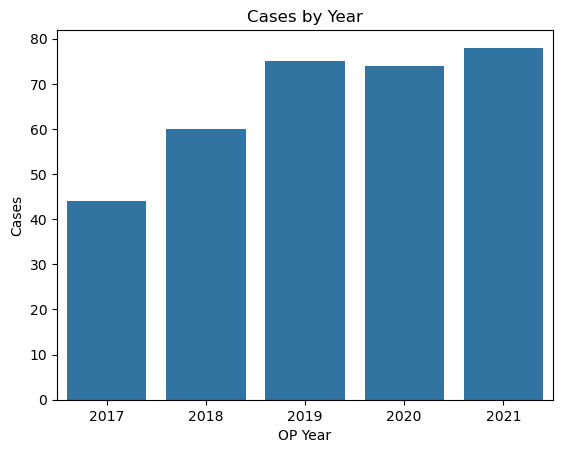

總復發率: 26.9%
18月內遠端復發率: 18.7%
24月內遠端復發率: 20.5%


In [18]:
#新增派生欄位
#OP Year
df1['Op_Year'] = df1['Radical_Op_Date'].dt.year
df1['Op_Year'].value_counts()
g=sns.countplot(x='Op_Year', data=df1)
g.set_title("Cases by Year")
g.set(xlabel="OP Year", ylabel="Cases")
plt.show()

#edr_18m & edr_24m
df1['time_to_recurrence'] = round((((df1['Recurrence_Date'] - df1['Radical_Op_Date']).dt.days)/30), 1)
df1['time_to_recurrence'].head()
df1['edr_18m'] = (df1['Recurrence'] == 1) & (df1['Recurrence_Type'].str.strip().str.lower().str.contains('distant', na=False)) & (df1['time_to_recurrence'] <= 18)
df1['edr_18m'] = df1['edr_18m'].astype("Int8")
df1['edr_24m'] = (df1['Recurrence'] == 1) & (df1['Recurrence_Type'].str.strip().str.lower().str.contains('distant', na=False)) & (df1['time_to_recurrence'] <= 24)
df1['edr_24m'] = df1['edr_24m'].astype("Int8")
df1['edr_18m'].value_counts()

#復發率
print(f"總復發率: {(df1['Recurrence'].mean()*100):.1f}%")
print(f"18月內遠端復發率: {(df1['edr_18m'].mean()*100):.1f}%")
print(f"24月內遠端復發率: {(df1['edr_24m'].mean()*100):.1f}%")

In [19]:
df1['PreOp_Albumin'].isna().sum()/346

np.float64(0.1531791907514451)

In [20]:
df1.to_parquet("/Users/huangshifeng/Desktop/stage_III_colon_surv/data/prepare_ML.parquet", engine="pyarrow", index=False)